In [227]:
import pyforest as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [228]:
d=pd.read_csv('/home/bultut/Downloads/Data_Science/train.csv')


In [229]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
d.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

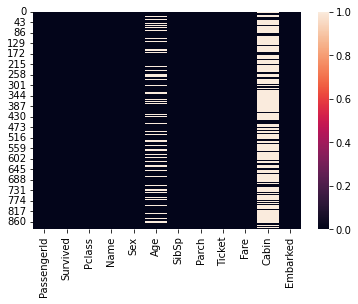

In [231]:
sns.heatmap(d.isna())

In [232]:
d['Age'].isna().sum()

177

In [233]:
d['Cabin'].isna().sum()/len(d['Cabin'])*100

77.10437710437711

In [234]:
d['Age'].isna().sum()/len(d['Age'])*100

19.865319865319865

In [235]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [236]:
d.shape

(891, 12)

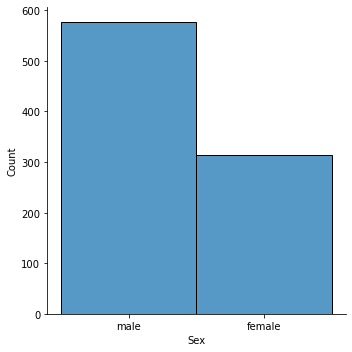

In [237]:
sns.displot(x='Sex',data=d)

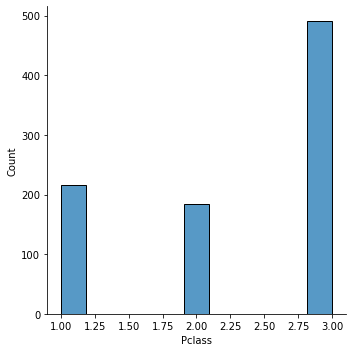

In [238]:
sns.displot(x='Pclass',data=d)

In [239]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
d.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
d=d.drop(columns='Cabin',axis=1)

In [242]:
d.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [243]:
d['Age'].fillna(d['Age'].mean(),inplace=True)

In [244]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

There are some columns that are unnecessary in our survival prediction. Ticket,Embarked,Sex(we need to replace them with dummy values using pandas delete Sex column and replace it with Gender column which we will create) and Name column.

In [245]:
d=d.drop(columns='Embarked')

In [246]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

<AxesSubplot:>

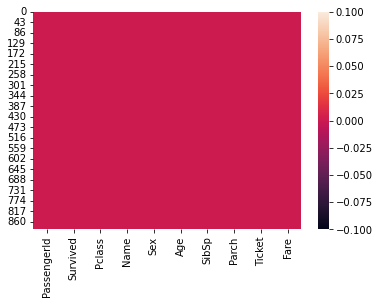

In [247]:
sns.heatmap(d.isna())

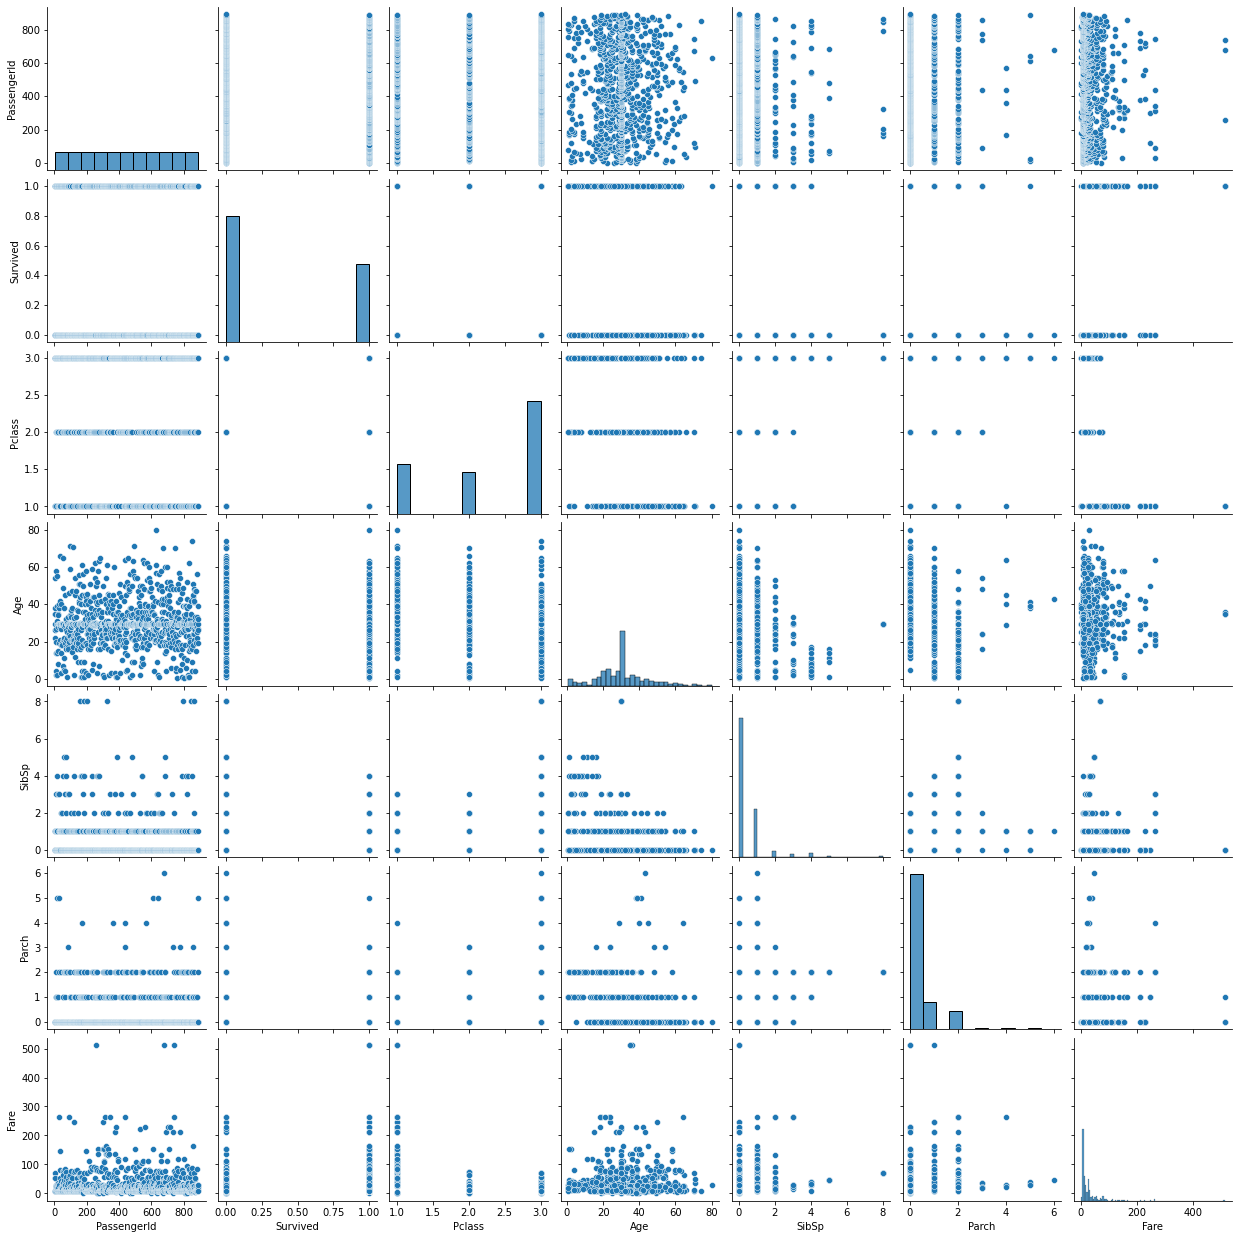

In [248]:
df=sns.pairplot(d)

<AxesSubplot:xlabel='Survived', ylabel='count'>

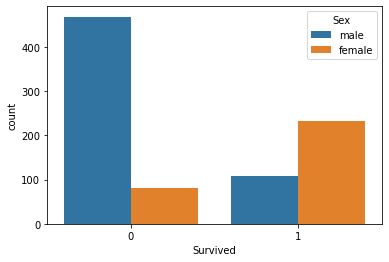

In [249]:
sns.countplot(x='Survived',data=d,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='count'>

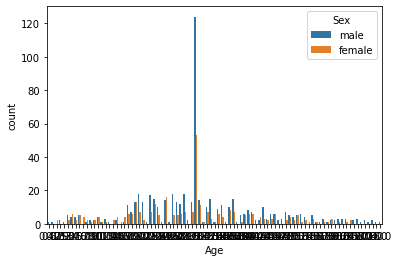

In [250]:
sns.countplot(x='Age',data=d,hue='Sex')

<AxesSubplot:xlabel='Age'>

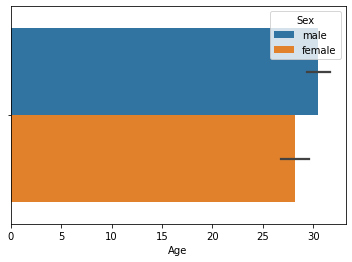

In [251]:
sns.barplot(x='Age',data=d,hue='Sex')

<AxesSubplot:xlabel='SibSp'>

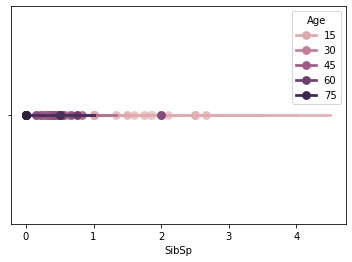

In [252]:
sns.pointplot(x='SibSp',data=d,hue='Age')

In [253]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


In [254]:
pd.get_dummies(d['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [255]:
Gender=pd.get_dummies(d['Sex'],drop_first=True)

In [256]:
d['Gender']=Gender

In [257]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1


In [258]:
d['Age'].isna().sum()

0

In [259]:
d.drop(['Name','Sex','Ticket'],axis=1,inplace=True)

In [260]:
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [261]:
x=d[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=d['Survived']

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.34,random_state=42)

In [265]:
#from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


/home/bultut/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [266]:
from sklearn.metrics import confusion_matrix

In [267]:
prediction=model.predict(x_test)

In [268]:
pd.DataFrame(confusion_matrix(y_test,prediction),columns=['predicted No','predicted Yes'],index=['Real No','Real Yes'])

,predicted No,predicted Yes
Real No,158,23
Real Yes,38,84


In [269]:
accuracy=accuracy_score(y_test,prediction)
print((accuracy)*100)

79.86798679867987


In [270]:
from sklearn.metrics import classification_report

In [271]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       181
           1       0.79      0.69      0.73       122

    accuracy                           0.80       303
   macro avg       0.80      0.78      0.79       303
weighted avg       0.80      0.80      0.80       303



In [272]:
from sklearn.naive_bayes import GaussianNB

In [273]:
model1=GaussianNB()
model1.fit(x_train,y_train)


GaussianNB()

In [274]:
predicted=model1.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       181
           1       0.76      0.75      0.75       122

    accuracy                           0.80       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.80      0.80      0.80       303



In [275]:
accurate=accuracy_score(y_test,predicted)


In [276]:
print((accurate)*100)

80.19801980198021


In [286]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       181
           1       0.76      0.75      0.75       122

    accuracy                           0.80       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.80      0.80      0.80       303



In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [280]:
answer=model2.predict(x_test)
acc=accuracy_score(y_test,answer)
print((acc)*100)

75.57755775577559


In [281]:
print(classification_report(y_test,answer))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       181
           1       0.70      0.68      0.69       122

    accuracy                           0.76       303
   macro avg       0.75      0.74      0.74       303
weighted avg       0.75      0.76      0.76       303



In [282]:
from sklearn.svm import SVC

In [283]:
model3=SVC()
model3.fit(x_train,y_train)

SVC()

In [284]:
assum=model3.predict(x_test)
press=accuracy_score(y_test,assum)
print((press)*100)

62.04620462046204


In [285]:
print(classification_report(y_test,assum))

              precision    recall  f1-score   support

           0       0.62      0.97      0.75       181
           1       0.68      0.11      0.18       122

    accuracy                           0.62       303
   macro avg       0.65      0.54      0.47       303
weighted avg       0.64      0.62      0.52       303

